In [97]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

CELL BELOW:
initiate node count, and connection between nodes (edge)
>AS DEPICTED SA FLOWCHART, AMO JA ANG "Initialize data structures and variables", kag other initializations and declarations is sa may dalom.

In [98]:
num_nodes2 = 10
edges2 = [(1, 2), (1, 3), (1, 4), (2, 5), (2, 6), (2, 7),
         (3, 7), (3, 8), (4, 9), (5, 6), (7, 10), (9, 10)]
num_nodes = 21
edges = [(1, 2), (1, 3), (1, 4), (2, 5), (2, 6), (2, 7),
         (3, 7), (3, 8), (4, 9), (5, 6), (7, 10), (9, 10), (10, 11), (11, 12),
         (11, 13), (11, 14), (12, 15), (12, 16), (12, 17),
         (13, 17), (13, 18), (14, 19), (15, 16), (17, 20), (19, 20)]

CELL BELOW:
define class nga mag generate kang graph for our bidirectional BFS which would be using edges to generate paths which will define the look of the graph

In [99]:
class Graph: #class nga gahimo kang adjacency list graph contains functions...
    def __init__(self, num_nodes, edges): #tana ja ang constructor
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes + 1)]
        for n1, n2 in edges:
            self.data[n1].append(n2)
            self.data[n2].append(n1)
        self.data.pop(0) #pop ko kay di kaya isipon kang range and num_nodes kay ga array counting sha ya (from 0) te i +1 ko. te tapos maappend ako don, mahimo paths, gahimo sha blank nga path sa una as result kang pag +1 sa range so kinanglan i-pop otherwise detrimental tana sasequences karon.
        #example, may num_nodes ako nga 10, mahimo ran nga 0 to 9 pero i + 1 ko para mahimo nga 0-10 tapos i pop(0) ko para i delete ang zero para mahimo nga 1-10 ezpz
    
    def __repr__(self): #function nga ginarewrite and data into dictionary syntax or adjacency list
        return"\n".join(["{}: {}".format(n+1, neighbors) for n, neighbors in enumerate(self.data)])
    
    def __str__(self): #function nga ginatawag ang __repr__ automatically
        return self.__repr__()
    
    def get_adjacency_list(self):
        adjacency_list = {}
        for n, neighbors in enumerate(self.data):
            adjacency_list[n + 1] = neighbors
        return adjacency_list

g1 = Graph(num_nodes, edges)
g2 = Graph(num_nodes, edges)
graph = g1.get_adjacency_list() #reassign contents kang g1 into graph dictionary
print("g1.data Adjacency List:\n(Node: [Neighbor Node, Neighbor Node, ...])")
print(g1)
print("graph Adjacency List: \n(Node: [Neighbor Node, Neighbor Node, ...])")
print(graph)

g1.data Adjacency List:
(Node: [Neighbor Node, Neighbor Node, ...])
1: [2, 3, 4]
2: [1, 5, 6, 7]
3: [1, 7, 8]
4: [1, 9]
5: [2, 6]
6: [2, 5]
7: [2, 3, 10]
8: [3]
9: [4, 10]
10: [7, 9, 11]
11: [10, 12, 13, 14]
12: [11, 15, 16, 17]
13: [11, 17, 18]
14: [11, 19]
15: [12, 16]
16: [12, 15]
17: [12, 13, 20]
18: [13]
19: [14, 20]
20: [17, 19]
21: []
graph Adjacency List: 
(Node: [Neighbor Node, Neighbor Node, ...])
{1: [2, 3, 4], 2: [1, 5, 6, 7], 3: [1, 7, 8], 4: [1, 9], 5: [2, 6], 6: [2, 5], 7: [2, 3, 10], 8: [3], 9: [4, 10], 10: [7, 9, 11], 11: [10, 12, 13, 14], 12: [11, 15, 16, 17], 13: [11, 17, 18], 14: [11, 19], 15: [12, 16], 16: [12, 15], 17: [12, 13, 20], 18: [13], 19: [14, 20], 20: [17, 19], 21: []}


CELL BELOW:
Generate a matplotlib + networkx visual aid for the graph.

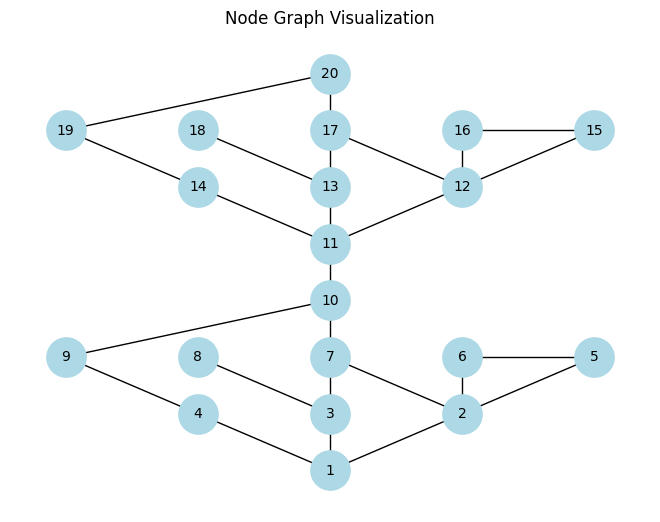

In [100]:
nx_graph = nx.Graph()

nx_graph.add_nodes_from(range(1, g1.num_nodes + 1))

for node, neighbors in enumerate(g1.data, start=1):
    for neighbor in neighbors:
        nx_graph.add_edge(node, neighbor)

generations = {}  # Dictionary to store the generation of each node
bfs_tree = nx.bfs_tree(nx_graph, source=1)
for node in bfs_tree.nodes:
    generations[node] = len(nx.shortest_path(bfs_tree, 1, node)) - 1

nx_graph_with_attributes = nx.Graph()
for node, generation in generations.items():
    nx_graph_with_attributes.add_node(node, generation=generation)

for edge in nx_graph.edges:
    nx_graph_with_attributes.add_edge(edge[0], edge[1])

pos = nx.multipartite_layout(nx_graph_with_attributes, subset_key="generation", align="horizontal")

# Draw the graph using matplotlib
nx.draw(nx_graph_with_attributes, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10, font_color='black')
plt.title("Node Graph Visualization")
plt.show()

CELL BELOW:
Ija adjust kang start kag end/target node para sa BFS ogey

In [101]:
BFS_Start = 20
BFS_Target = 1

CELL BELOW:
BFS

In [102]:
def BFS(graph, BFS_Start, BFS_Target):
    global BFSPath #extract ang BFSPath para magamit outside kang bfs function
    visited = set()
    queue = deque([(BFS_Start, [BFS_Start])])

    while queue:
        node, path = queue.popleft()
        if node == BFS_Target:
            print("Shortest path:", ' -> '.join(map(str, path)))
            BFSPath = path
            return
        if node not in visited:
            visited.add(node)
            for child in graph.get(node, []):
                if child not in visited:
                    new_path = path + [child]
                    queue.append((child, new_path))

CELL BELOW:
PRINT BFS

In [103]:
BFS(graph, BFS_Start, BFS_Target)
print("Extracted BFS Path (List):", BFSPath)

Shortest path: 20 -> 17 -> 12 -> 11 -> 10 -> 7 -> 2 -> 1
Extracted BFS Path (List): [20, 17, 12, 11, 10, 7, 2, 1]


CELL BELOW: Used ChatGPT to visualize the path

In [104]:
#UNDER CONSTRUCTION POTA

CELL BELOW:
BIDIRECTIONAL ATTEMPT

In [105]:
def Forward(graph, BFS_Start, BFS_Target):
    global ForwardPath #extract ang BFSPath para magamit outside kang bfs function
    visited = set()
    queue = deque([(BFS_Start, [BFS_Start])])

    while queue:
        node, path = queue.popleft()
        if node == BFS_Target:
            print("Shortest path:", ' -> '.join(map(str, path)))
            ForwardPath = path
            return
        if node not in visited:
            visited.add(node)
            for child in graph.get(node, []):
                if child not in visited:
                    new_path = path + [child]
                    queue.append((child, new_path))

def Backward(graph, BFS_Start, BFS_Target):
    global BackwardPath
    visited = set()
    queue = deque([(BFS_Target, [BFS_Target])])

    while queue:
        node, path = queue.popleft()
        if node == BFS_Target:
            print("Shortest path:", ' -> '.join(map(str, path)))
            BackwardPath = path
            return
        if node not in visited:
            visited.add(node)
            for child in graph.get(node, []):
                if child not in visited:
                    new_path = path + [child]
                    queue.append((child, new_path))

CELL BELOW:
>According sa flowchart, amoja ang mangin lever for "Select Start and Goal Nodes"

In [106]:
#UNDER CONSTRUCTION

In [107]:
def bidirectional_BFS(graph, BFS_Start, BFS_Target):
    Forward_visited = set()
    Backward_visited = set()
    ForwardBFS = deque([(BFS_Start, [BFS_Start])])
    BackwardBFS = deque([(BFS_Target, [BFS_Target])])

    while ForwardBFS and BackwardBFS:
        forward_node, forward_path = ForwardBFS.popleft()
        backward_node, backward_path = BackwardBFS.popleft()

        if forward_node in Backward_visited or forward_node == backward_node:
            # Common node found, combine the paths and return
            common_node = forward_node
            backward_path.reverse()  # Reverse the backward path
            shortest_path = forward_path + backward_path[1:]  # Exclude common node
            print("Shortest path:", ' -> '.join(map(str, shortest_path)))
            return

        if forward_node not in Forward_visited:
            Forward_visited.add(forward_node)
            for child in graph.get(forward_node, []):
                if child not in Forward_visited:
                    new_path = forward_path + [child]
                    ForwardBFS.append((child, new_path))

        if backward_node not in Backward_visited:
            Backward_visited.add(backward_node)
            for parent in graph.get(backward_node, []):
                if parent not in Backward_visited:
                    new_path = backward_path + [parent]
                    BackwardBFS.append((parent, new_path))

bidirectional_BFS(graph, BFS_Start, BFS_Target)

Shortest path: 20 -> 17 -> 12 -> 11 -> 10 -> 9 -> 4 -> 1


In [108]:
bidirectional_BFS(graph, BFS_Start, BFS_Target)

Shortest path: 20 -> 17 -> 12 -> 11 -> 10 -> 9 -> 4 -> 1


In [109]:
import profile

print("Bidirectional:")
profile.run("bidirectional_BFS(graph, BFS_Start, BFS_Target)")
bidirectional_BFS(graph, BFS_Start, BFS_Target)

Bidirectional:
Shortest path: 20 -> 17 -> 12 -> 11 -> 10 -> 9 -> 4 -> 1
         132 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 3748056757.py:1(bidirectional_BFS)
        4    0.000    0.000    0.000    0.000 :0(__exit__)
       20    0.000    0.000    0.000    0.000 :0(add)
       26    0.000    0.000    0.000    0.000 :0(append)
        1    0.000    0.000    0.000    0.000 :0(exec)
       20    0.000    0.000    0.000    0.000 :0(get)
        4    0.000    0.000    0.000    0.000 :0(getpid)
        4    0.000    0.000    0.000    0.000 :0(isinstance)
        1    0.000    0.000    0.000    0.000 :0(join)
        4    0.000    0.000    0.000    0.000 :0(len)
       26    0.000    0.000    0.000    0.000 :0(popleft)
        1    0.000    0.000    0.000    0.000 :0(print)
        1    0.000    0.000    0.000    0.000 :0(reverse)
        1    0.000   

In [110]:
print("BFS:")
profile.run("BFS(graph, BFS_Start, BFS_Target)")

BFS:
Shortest path: 20 -> 17 -> 12 -> 11 -> 10 -> 7 -> 2 -> 1
         115 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 3760256455.py:1(BFS)
        4    0.000    0.000    0.000    0.000 :0(__exit__)
       16    0.000    0.000    0.000    0.000 :0(add)
       24    0.000    0.000    0.000    0.000 :0(append)
        1    0.000    0.000    0.000    0.000 :0(exec)
       16    0.000    0.000    0.000    0.000 :0(get)
        4    0.000    0.000    0.000    0.000 :0(getpid)
        4    0.000    0.000    0.000    0.000 :0(isinstance)
        1    0.000    0.000    0.000    0.000 :0(join)
        4    0.000    0.000    0.000    0.000 :0(len)
       20    0.000    0.000    0.000    0.000 :0(popleft)
        1    0.000    0.000    0.000    0.000 :0(print)
        1    0.000    0.000    0.000    0.000 :0(setprofile)
        4    0.000    0.000    0.000    0.